In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Tweets.csv')  # Update path if needed

# Display first few rows
print(df.head())




       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Function to clean tweets
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(clean_text)

# Check results
print(df[['text', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nkolh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nkolh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                               cleaned_text  
0                        id responded going  
1                   sooo sad miss san diego  
2                             boss bullying  
3                     interview leave alone  
4  sons couldnt put releases already bought  


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Convert text to TF-IDF features
X = vectorizer.fit_transform(df['cleaned_text'])

# Assign sentiment labels
y = df['sentiment']

print(X.shape, y.shape)


(27481, 5000) (27481,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape, "Testing size:", X_test.shape)


Training size: (21984, 5000) Testing size: (5497, 5000)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6830998726578134
Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.59      0.65      1562
     neutral       0.62      0.75      0.68      2230
    positive       0.77      0.69      0.72      1705

    accuracy                           0.68      5497
   macro avg       0.70      0.67      0.68      5497
weighted avg       0.69      0.68      0.68      5497



In [14]:
def predict_sentiment(new_tweet):
    cleaned_tweet = clean_text(new_tweet)  # Clean text
    vectorized_tweet = vectorizer.transform([cleaned_tweet])  # Convert to TF-IDF
    return model.predict(vectorized_tweet)[0]

# Test example
new_tweet = "I love data science and machine learning!"
print("Predicted Sentiment:", predict_sentiment(new_tweet))


Predicted Sentiment: positive


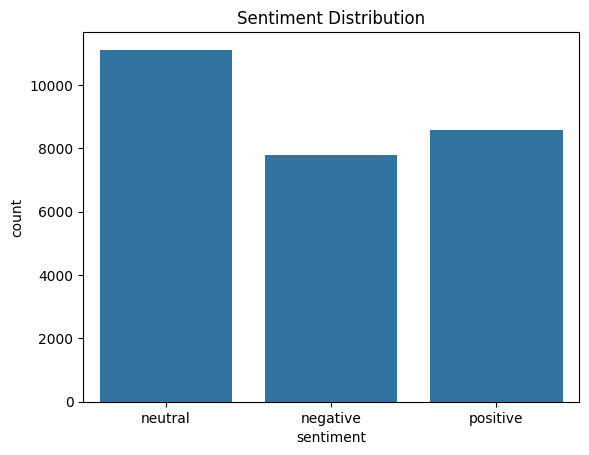

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['sentiment'])
plt.title("Sentiment Distribution")
plt.show()
